# Part A

## 1.	POS tagging

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

sentence = "The big black dog barked at the white cat and chased away."
tokens = nltk.word_tokenize(sentence)
nltk_pos_tags = nltk.pos_tag(tokens)
print(nltk_pos_tags)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('The', 'DT'), ('big', 'JJ'), ('black', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('white', 'JJ'), ('cat', 'NN'), ('and', 'CC'), ('chased', 'VBD'), ('away', 'RB'), ('.', '.')]


## 2.	Differences of the POS taggers

In [ ]:
from textblob import TextBlob

sentence = "The big black dog barked at the white cat and chased away."
blob = TextBlob(sentence)
textblob_pos_tags = blob.tags
print(textblob_pos_tags)


[('The', 'DT'), ('big', 'JJ'), ('black', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('white', 'JJ'), ('cat', 'NN'), ('and', 'CC'), ('chased', 'VBD'), ('away', 'RB')]


## 3.	Parse trees

In [ ]:
from nltk.tag import RegexpTagger

sentence = "The big black dog barked at the white cat and chased away."
patterns = [
    (r'.*ing$', 'VBG'),
    (r'.*ed$', 'VBD'),
    (r'.*s$', 'NNS'),
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),
    (r'.*', 'NN')
]
regexp_tagger = RegexpTagger(patterns)
tokens = nltk.word_tokenize(sentence)
regexp_pos_tags = regexp_tagger.tag(tokens)
print(regexp_pos_tags)


[('The', 'NN'), ('big', 'NN'), ('black', 'NN'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'NN'), ('the', 'NN'), ('white', 'NN'), ('cat', 'NN'), ('and', 'NN'), ('chased', 'VBD'), ('away', 'NN'), ('.', 'NN')]


In [ ]:
import nltk

# Make sure to download the required NLTK packages
nltk.download('punkt')

# Define the grammar for parsing the sentence
grammar = nltk.CFG.fromstring("""
    S -> NP VP
    NP -> Det AdjP N | Det N
    AdjP -> Adj AdjP | Adj
    VP -> V NP PP | V PP | V NP | VP Conj VP | V Adv | V
    PP -> P NP
    Det -> 'The' | 'the'
    N -> 'dog' | 'cat'
    Adj -> 'big' | 'black' | 'white'
    V -> 'barked' | 'chased'
    P -> 'at'
    Conj -> 'and'
    Adv -> 'away'
""")

# Sentence to be parsed
sentence = "The big black dog barked at the white cat and chased away"

# Tokenize the sentence
tokens = nltk.word_tokenize(sentence)

# Create a parser with the defined grammar
parser = nltk.ChartParser(grammar)

# Generate parse trees
trees = list(parser.parse(tokens))

# Print parse trees
if trees:
    for tree in trees:
        tree.pretty_print()
else:
    print("No parse trees were generated. Please check the grammar rules and sentence structure.")


                               S                                        
      _________________________|____________                             
     |                                      VP                          
     |                              ________|____________________        
     |                             VP                |           |      
     |                    _________|___              |           |       
     NP                  |             PP            |           |      
  ___|______________     |      _______|____         |           |       
 |      AdjP        |    |     |            NP       |           |      
 |    ___|_____     |    |     |    ________|____    |           |       
 |   |        AdjP  |    |     |   |       AdjP  |   |           VP     
 |   |         |    |    |     |   |        |    |   |      _____|___    
Det Adj       Adj   N    V     P  Det      Adj   N  Conj   V        Adv 
 |   |         |    |    |     |   |        |

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Part B



## 1.	Supervised Text Classification models




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_recall_curve
from sklearn.pipeline import Pipeline
from google.colab import drive

In [ ]:
# Mount & Load dataset
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/singapore_airlines_reviews.csv')

print(data.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(10000, 7)


In [ ]:
# map the ratings to binary labels,
# ratings 4 and 5 could be considered positive (1) and the rest negative (0).
data['label'] = (data['rating'] > 3).astype(int)

# Selecting features and labels
X = data['text']  # Text column for features
y = data['label']  # New binary 'label' column for labels

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a pipeline with TfidfVectorizer and SVC
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', SVC(kernel='linear'))
])

In [ ]:
# Train the classifier on the training data
pipeline.fit(X_train, y_train)

# Predict labels for the test data
y_pred = pipeline.predict(X_test)

In [ ]:
# Evaluate the classifier
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       527
           1       0.92      0.94      0.93      1473

    accuracy                           0.90      2000
   macro avg       0.88      0.86      0.87      2000
weighted avg       0.90      0.90      0.90      2000

Accuracy: 0.8985


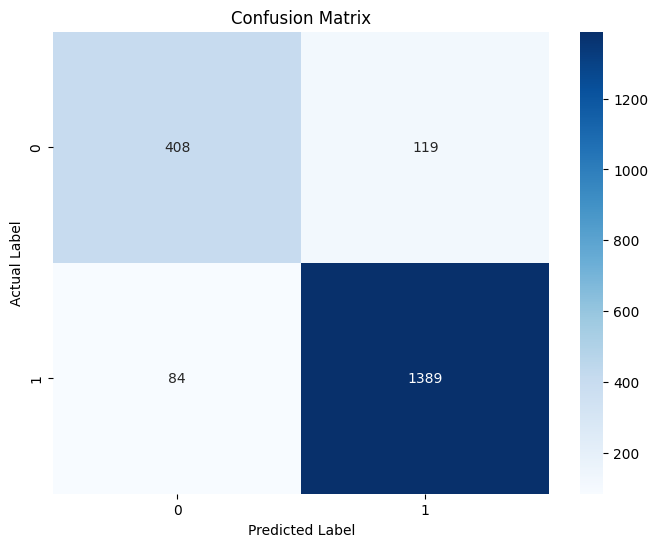

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

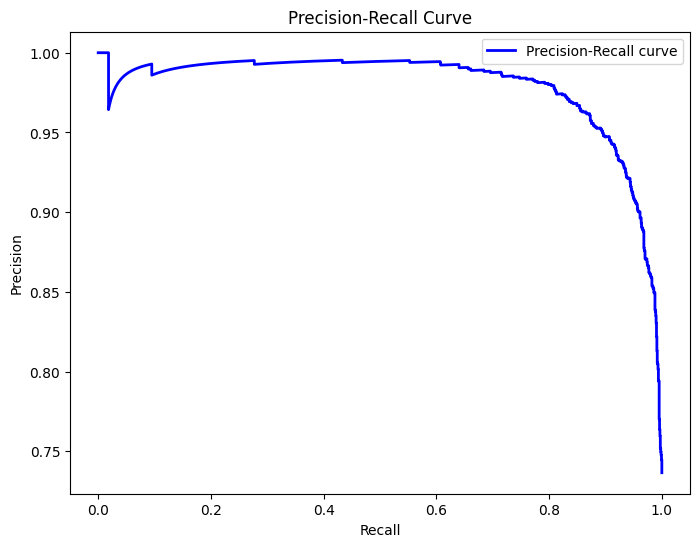

In [ ]:
# Plotting Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, pipeline.decision_function(X_test))
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()


## **Random Forest**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import loguniform

# Load dataset
data = pd.read_csv(r"C:\Users\hanto\Downloads\singapore_airlines_reviews.csv")

print(data.shape)

# Map the ratings to binary labels,
# Ratings 4 and 5 could be considered positive (1) and the rest negative (0)
data['label'] = (data['rating'] > 3).astype(int)

# Selecting features and labels
X = data['text']  # Text column for features
y = data['label']  # New binary 'label' column for labels

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with TfidfVectorizer and SVC
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', SVC(probability=True))  # Set probability to True to enable predict_proba
])

# Define grid of hyperparameters for tuning
param_distributions = {
    'tfidf__max_features': [1000, 2000, 3000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': loguniform(1e-3, 1e3),  # Search over a logarithmic scale
    'clf__kernel': ['linear', 'rbf', 'poly'],  # Include different kernel types
    'clf__gamma': ['scale', 'auto']  # Adjust gamma parameter for 'rbf' and 'poly' kernels
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=50, cv=5, n_jobs=-1)

# Train the classifier on the training data
random_search.fit(X_train, y_train)

# Get the best model from random search
best_model = random_search.best_estimator_

# Predict labels and probabilities for the test data using the best model
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)

# Evaluate the best model
print("Best Model Parameters:", random_search.best_params_)
print("Best Model Score:", random_search.best_score_)
print("\nTest Set Performance:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Plotting Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1])  # Extracting probabilities for positive class
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()
